In [1]:
import pandas as pd
import great_expectations as gx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/adult.csv')

# Feature Engineering 1. Runde

- age und hours-per-week sind gut verteile numerische Variablen und können beibehalten werden
- Capital Gain und Capital Loss bilanzieren zu Capital Net
- Capital Net kategorisieren
- occupation, workclass, marital-status, relationship, native-country kategorien zusmmenfassen
- gender und income binärisieren
- da educational-num bereits ein gutes feature encoding hat, wird education entfernt
- weitere nicht notwendige Spalten entfernen
- Zeilen mit Fragezeichen entfernen

## Engineering der Capital-Spalten

### Capital Net erstellen

In [3]:
df['capital-net'] = df['capital-gain'] - df['capital-loss']

### Capital Net betrachten

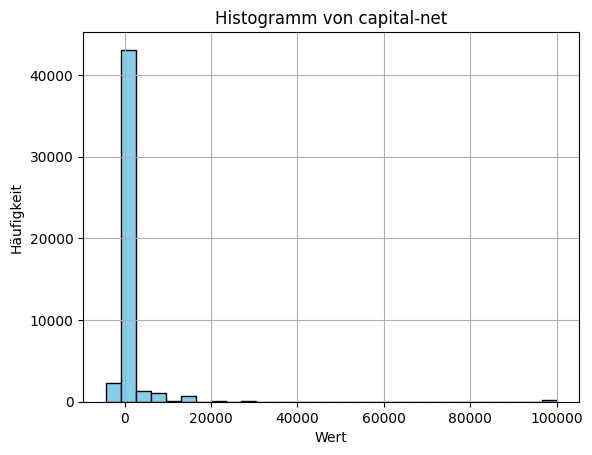

In [4]:
df['capital-net'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von capital-net')
plt.show()

In [5]:
(df['capital-net'] == 0).sum()

42525

(array([2.245e+03, 5.870e+02, 1.330e+03, 1.016e+03, 1.000e+02, 6.560e+02,
        2.000e+00, 5.000e+01, 2.000e+01, 5.800e+01, 0.000e+00, 6.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.440e+02]),
 array([-4356. ,  -877.5,  2601. ,  6079.5,  9558. , 13036.5, 16515. ,
        19993.5, 23472. , 26950.5, 30429. , 33907.5, 37386. , 40864.5,
        44343. , 47821.5, 51300. , 54778.5, 58257. , 61735.5, 65214. ,
        68692.5, 72171. , 75649.5, 79128. , 82606.5, 86085. , 89563.5,
        93042. , 96520.5, 99999. ]),
 <BarContainer object of 30 artists>)

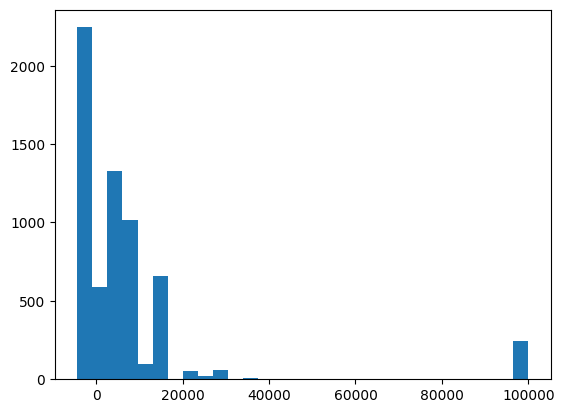

In [6]:
cap_net = [i for i in df['capital-net'] if i!=0]

plt.hist(cap_net, bins=30)

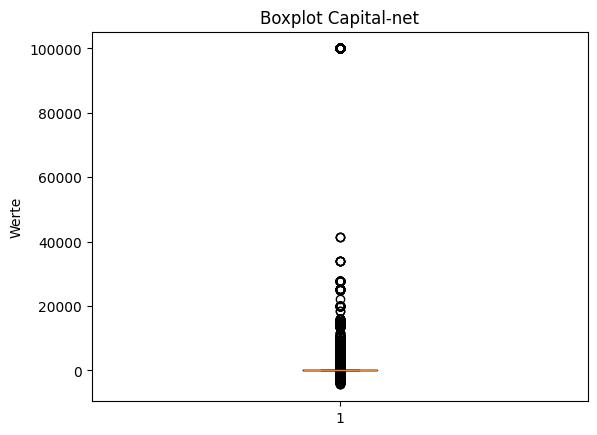

In [7]:
# Boxplot zeichnen
plt.boxplot(df['capital-net'])

# Titel und Achsenbeschriftung hinzufügen
plt.title('Boxplot Capital-net')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

### Capital Net kategorisieren

In [8]:
def categorize_cap_net(wert):
    if wert <= 0:
        return 'Net Loss or Zero'
    elif 0 < wert < 10000:
        return 'Normal Gain'
    else:
        return 'High Gain'

## Eniginnering weiterer Spalten:

- occupation vereinfachen
- workclass vereinfachen
- marital-status vereinfachen
- relationship vereinfachen
- native-country -> native-region

In [9]:
def simplify_occupation(wert):
    if wert in ['Transport-moving', 'Handlers-cleaners', 'Priv-house-serv', 'Machine-op-inspct', 'Other-service']:
        return 'Simple Services'
    elif wert in ['Protective-serv', 'Armed-Forces']:
        return 'Public Safety'
    elif wert in ['Craft-repair', 'Tech-support']:
        return 'Specialized Services'
    elif wert in ['Prof-specialty']:
        return 'Professional'
    elif wert in ['Exec-managerial']:
        return 'Management'
    elif wert in ['Adm-clerical']:
        return 'Administrative'
    else:
        return wert
    
def simplify_workclass(wert):
    if wert in ['Local-gov', 'State-gov', 'Federal-gov']:
        return 'Government'
    elif wert in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self Employed'
    elif wert in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    else:
        return wert
    
def simplify_marital_status(wert):
    if wert in ['Divorced', 'Separated']:
        return 'Separated'
    elif wert in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'Married'
    else:
        return wert
    
def simplify_relationship(wert):
    if wert in ['Not-in-family', 'Other-relative']:
        return 'Shared Housing'
    elif wert in ['Own-child']:
        return 'Child'
    elif wert in ['Unmarried']:
        return 'Single'
    else:
        return wert


In [10]:
def simplify_country(wert):
    if wert in ['United-States']:
        return 'USA'
    elif wert in ['Canada']:
        return 'Canada'
    elif wert in ['Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Haiti', 'El-Salvador', 'Puerto Rico', 'Columbia', 'Cambodia', 'Laos', 'Cuba',
                  'Nicaragua', 'Honduras', 'Jamaica', 'Ecuador']:
        return 'Latin America'
    elif wert in ['Ireland', 'Germany', 'England', 'Scotland', 'France', 'Holand-Netherlands']:
        return 'Central & Western Europe'
    elif wert in ['Poland', 'Italy', 'Portugal', 'Yugoslavia', 'Hungary', 'Greece']:
        return 'Southern & Eastern Europe'
    elif wert in ['Philippines', 'Thailand', 'Vietnam', 'Japan', 'India', 'Taiwan', 'China', 'Hong']:
        return 'Southern & Eastern Asia'
    elif wert in ['Iran']:
        return 'Central & Western Asia'
    elif wert in ['South']:
        return 'Africa'
    elif wert in ['Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)']:
        return 'Pacifics'

- gender in is_Male binärisieren
- income in income >50K binärisieren

In [11]:
def binarizer(df):
    df['is_Male'] = df['gender'].map({'Male': 1, 'Female': 0})
    df['income >50K'] = df['income'].map({'>50K': 1, '<=50K': 0})
    return df

### Anwenden

In [12]:
def feature_engineering(df):

    df = df[~df.isin(['?']).any(axis=1)].copy() # Zeilen mit Fragezeichen droppen
    
    df.loc[:, 'capital-net'] = df['capital-net'].apply(categorize_cap_net)

    df.loc[:, 'occupation'] = df['occupation'].apply(simplify_occupation)
    df.loc[:, 'workclass'] = df['workclass'].apply(simplify_workclass)
    df.loc[:, 'marital-status'] = df['marital-status'].apply(simplify_marital_status)
    df.loc[:, 'relationship'] = df['relationship'].apply(simplify_relationship)
    df['native-region'] = df['native-country'].apply(simplify_country)

    df = binarizer(df)

    df.drop(columns=['education', 'fnlwgt', 'native-country', 'capital-gain', 'capital-loss', 'gender', 'income'], inplace=True) # Unnötige Spalten droppen

    return df

In [13]:
df = feature_engineering(df)

## Betrachtung der Ergebnisse des ersten Feature Engineering

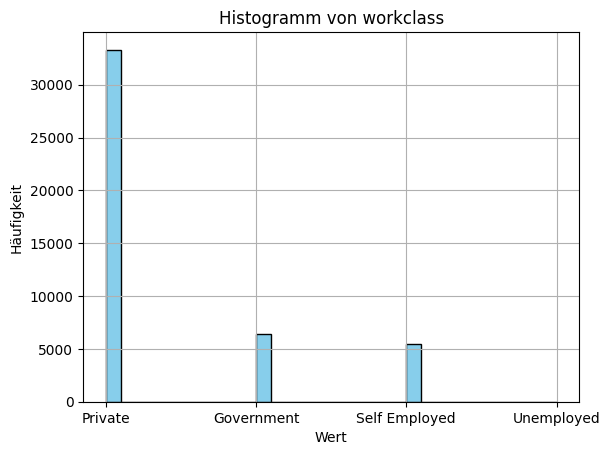

In [14]:
df['workclass'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von workclass')
plt.show()

In [15]:
df['workclass'].value_counts()

workclass
Private          33307
Government        6452
Self Employed     5442
Unemployed          21
Name: count, dtype: int64

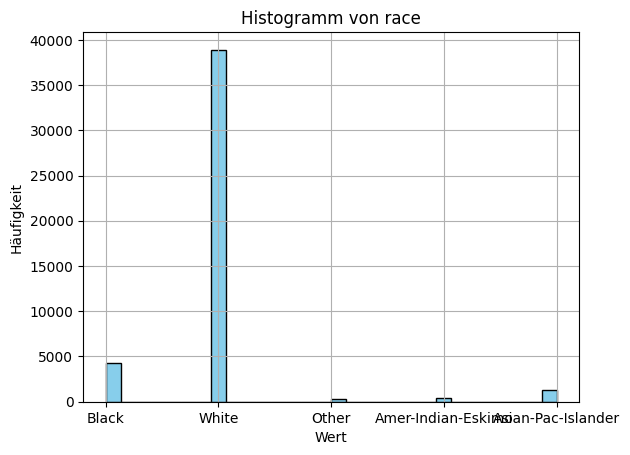

In [16]:
df['race'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von race')
plt.show()

In [17]:
df['race'].value_counts()

race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

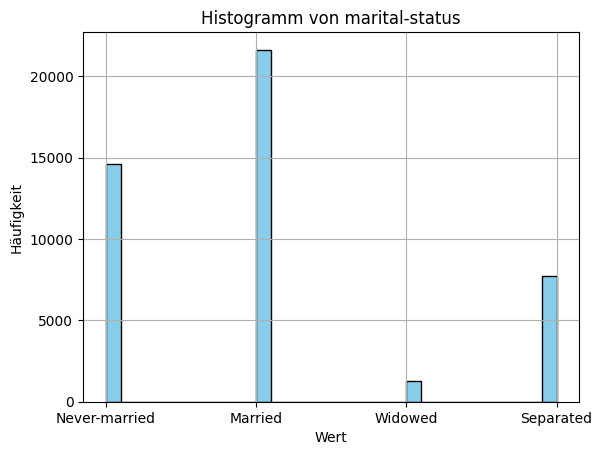

In [18]:
df['marital-status'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von marital-status')
plt.show()

In [19]:
df['marital-status'].value_counts()

marital-status
Married          21639
Never-married    14598
Separated         7708
Widowed           1277
Name: count, dtype: int64

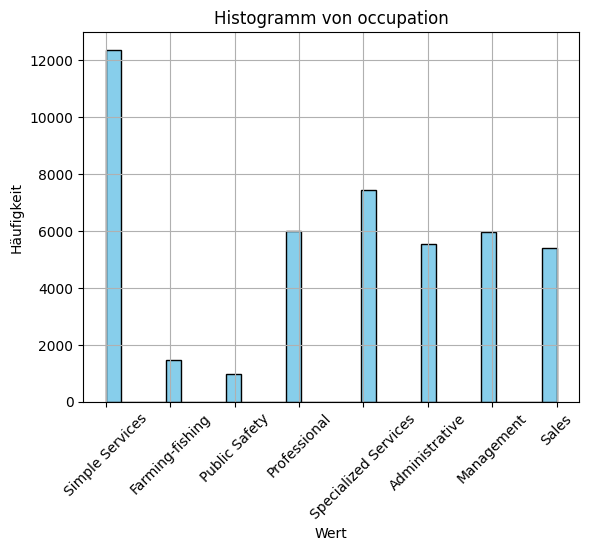

In [20]:
df['occupation'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von occupation')
plt.xticks(rotation=45)
plt.show()

In [21]:
df['occupation'].value_counts()

occupation
Simple Services         12372
Specialized Services     7440
Professional             6008
Management               5984
Administrative           5540
Sales                    5408
Farming-fishing          1480
Public Safety             990
Name: count, dtype: int64

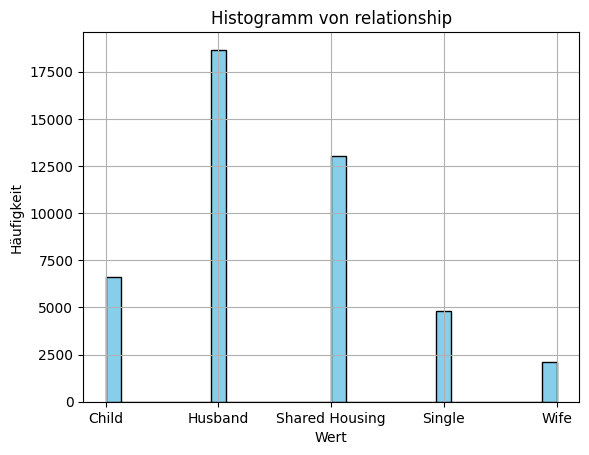

In [22]:
df['relationship'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von relationship')
plt.show()

In [23]:
df['relationship'].value_counts()

relationship
Husband           18666
Shared Housing    13051
Child              6626
Single             4788
Wife               2091
Name: count, dtype: int64

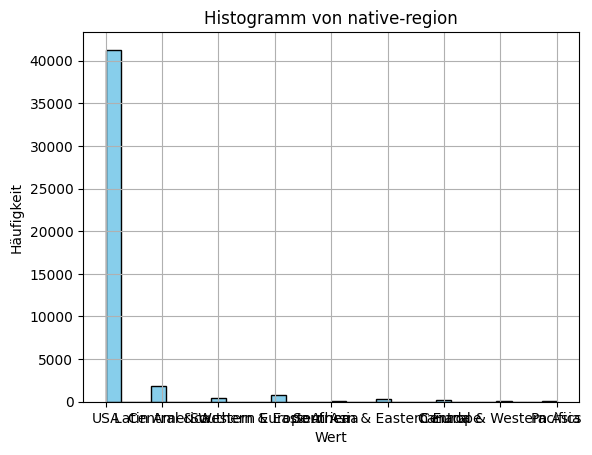

In [24]:
df['native-region'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von native-region')
plt.show()

In [25]:
df['native-region'].value_counts()

native-region
USA                          41292
Latin America                 1822
Southern & Eastern Asia        827
Central & Western Europe       405
Southern & Eastern Europe      333
Canada                         163
Africa                         101
Central & Western Asia          56
Pacifics                        48
Name: count, dtype: int64

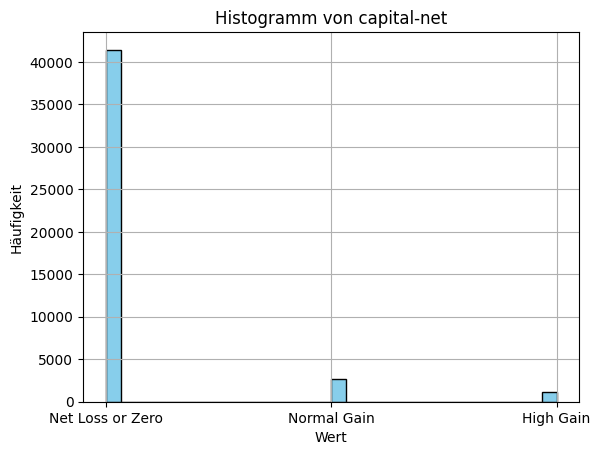

In [26]:
df['capital-net'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm von capital-net')
plt.show()

In [27]:
df['capital-net'].value_counts()

capital-net
Net Loss or Zero    41432
Normal Gain          2704
High Gain            1086
Name: count, dtype: int64

# Feature Engineering 2. Runde

- race binärisieren
- widowed und separated bei merital-status zusammenfügen
- farming/fishing zu professional hinzufügen bei occupation
- native-region binärisieren
- capital-net binärisieren

In [28]:
def binarizer(df):
    df['is_White'] = df['race'].map(lambda x: 1 if x == 'White' else 0)
    df['from_USA'] = df['native-region'].map(lambda x: 1 if x == 'USA' else 0)
    df['gained-capital'] = df['capital-net'].map(lambda x: 1 if x in ['Normal Gain', 'High Gain'] else 0)
    return df

def simplify_marital_status(wert):
    if wert in ['Widowed', 'Separated']:
        return 'Widowed/Separated'
    else:
        return wert
    
def simplify_occupation(wert):
    if wert in ['Farming-fishing']:
        return 'Professional'
    else:
        return wert

In [29]:
def feature_engineering(df):

    df.loc[:, 'occupation'] = df['occupation'].apply(simplify_occupation)
    df.loc[:, 'marital-status'] = df['marital-status'].apply(simplify_marital_status)

    df = binarizer(df)

    df.drop(columns=['race', 'native-region', 'capital-net'], inplace=True) # Unnötige Spalten droppen

    return df

In [30]:
df = feature_engineering(df)

### Expectation Suite

Geht aus der Vorverarbeitung der gewünschte Datensatz hervor?

In [31]:
context = gx.get_context()
data_source = context.data_sources.add_pandas(name = "my_pandas_datasource")
data_asset = data_source.add_dataframe_asset(name = "my_dataframe_asset")
batch_definition = data_asset.add_batch_definition_whole_dataframe(name = "my_batch_definition")
batch = batch_definition.get_batch(batch_parameters={"dataframe": df})

age_expect = gx.expectations.ExpectColumnValuesToBeOfType(
    column='age',
    type_='int'
)

cap_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='gained-capital',
    value_set=[0, 1]
)

workclass_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='workclass',
    value_set=['Government', 'Self Employed', 'Unemployed', 'Private']
)

education_expect = gx.expectations.ExpectColumnValuesToBeOfType(
    column='educational-num',
    type_='int'
)

marital_status_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='marital-status',
    value_set=['Widowed/Separated', 'Married', 'Never-married']
)

occupation_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='occupation',
    value_set=['Simple Services', 'Public Safety', 'Specialized Services', 'Professional', 'Management', 'Administrative', 'Sales']
)

relationship_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='relationship',
    value_set=['Shared Housing', 'Child', 'Husband', 'Wife', 'Single']
)

race_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='is_White',
    value_set=[0, 1]
)

gender_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='is_Male',
    value_set=[0, 1]
)

native_region_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='from_USA',
    value_set=[0, 1]
)

income_expect = gx.expectations.ExpectColumnValuesToBeInSet(
    column='income >50K',
    value_set=[0, 1]
)

In [32]:
suite = gx.ExpectationSuite(name = "my_suite")
suite.expectations.extend([age_expect, cap_expect, workclass_expect,
                           education_expect, marital_status_expect, occupation_expect,
                           relationship_expect, race_expect, gender_expect,
                           native_region_expect, income_expect])

validation_results = batch.validate(expect=suite)

validation_results.success

Calculating Metrics: 100%|██████████| 66/66 [00:00<00:00, 245.22it/s]


False

In [ ]:
df.to_csv('../data/processed/processed_data.csv', index=False)
df.to_csv('../mlflow/data/processed/processed_data.csv', index=False)

# Finaler Datensatz

In [34]:
df

,age,workclass,educational-num,marital-status,occupation,relationship,hours-per-week,is_Male,income >50K,is_White,from_USA,gained-capital
0,25,Private,7,Never-married,Simple Services,Child,40,1,0,0,1,0
1,38,Private,9,Married,Professional,Husband,50,1,0,1,1,0
2,28,Government,12,Married,Public Safety,Husband,40,1,1,1,1,0
3,44,Private,10,Married,Simple Services,Husband,40,1,1,0,1,1
5,34,Private,6,Never-married,Simple Services,Shared Housing,30,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married,Specialized Services,Wife,38,0,0,1,1,0
48838,40,Private,9,Married,Simple Services,Husband,40,1,1,1,1,0
48839,58,Private,9,Widowed/Separated,Administrative,Single,40,0,0,1,1,0
48840,22,Private,9,Never-married,Administrative,Child,20,1,0,1,1,0


An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

| Column Name      | Data Type   | Description                                                                                   | Possible Values |
|------------------|------------|-----------------------------------------------------------------------------------------------|----------------|
| `age`            | Integer    | The age of the individual.                                                                    | Continuous     |
| `education-num`  | Integer    | Number of years of education completed.                                                       | Continuous     |
| `hours-per-week` | Integer    | The number of hours worked per week.                                                          | Continuous     |
| `workclass`      | Categorical | Employment status of the individual.                          | Private, Government, Self-Employed, Unemployed|
| `marital-status` | Categorical | Marital status of the individual.                                  | Married, Never-Married, Widowed/Separated|
| `occupation`     | Categorical | Type of work the individual performs | Simple-Services, Professional, Specialized-Services, Management, Administrative, Sales, Public Safety|
| `relationship`   | Categorical | Relationship status within the household.                      | Husband, Wife, Child, Shared-Housing, Single |
| `is_White`       | Binary | 1 if individual is white                                                                                     | 1, 0|
| `is_Male`        | Binary | 1 if individual is Male                                                                                      | 1, 0|
| `gained_capital` | Binary    | 1 if individual gained from capital market                                                                | 1, 0|
| `from_USA`       | Binary | 1 if individual was born in United States                                                                    | 1, 0|
| `income >50K`    | Binary | 1 if individual earns more than 50K                                                                          | 1, 0|



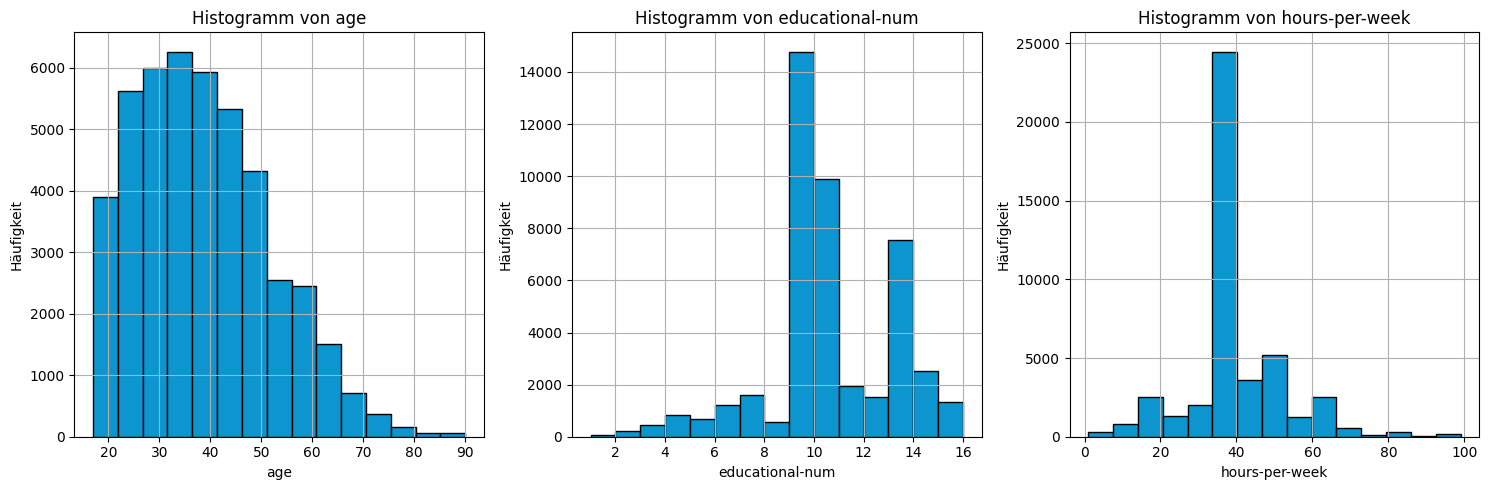

In [35]:
columns = ['age', 'educational-num', 'hours-per-week']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for col, ax in zip(columns, axes):
    df[col].hist(bins=15, ax=ax, color='#0D95D0', edgecolor='black')
    ax.set_title(f'Histogramm von {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

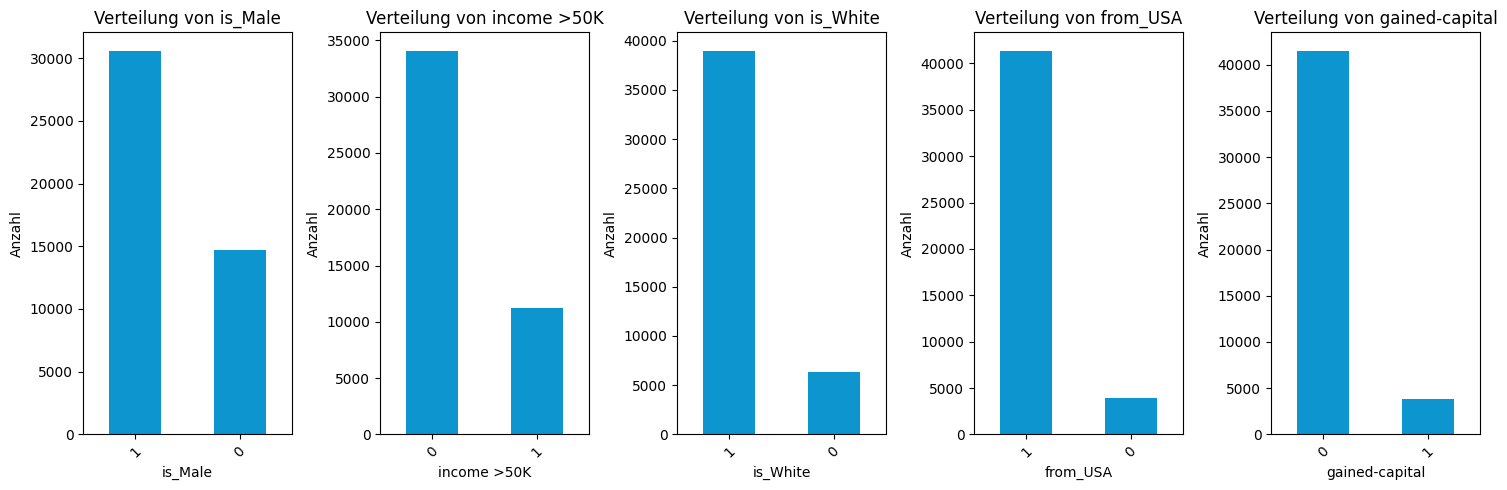

In [36]:
binary_columns = ['is_Male', 'income >50K', 'is_White', 'from_USA', 'gained-capital']

fig, axes = plt.subplots(nrows=1, ncols=len(binary_columns), figsize=(15, 5))

for col, ax in zip(binary_columns, axes):
    df[col].value_counts().plot(kind='bar', ax=ax, color='#0D95D0')
    ax.set_title(f'Verteilung von {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Anzahl')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

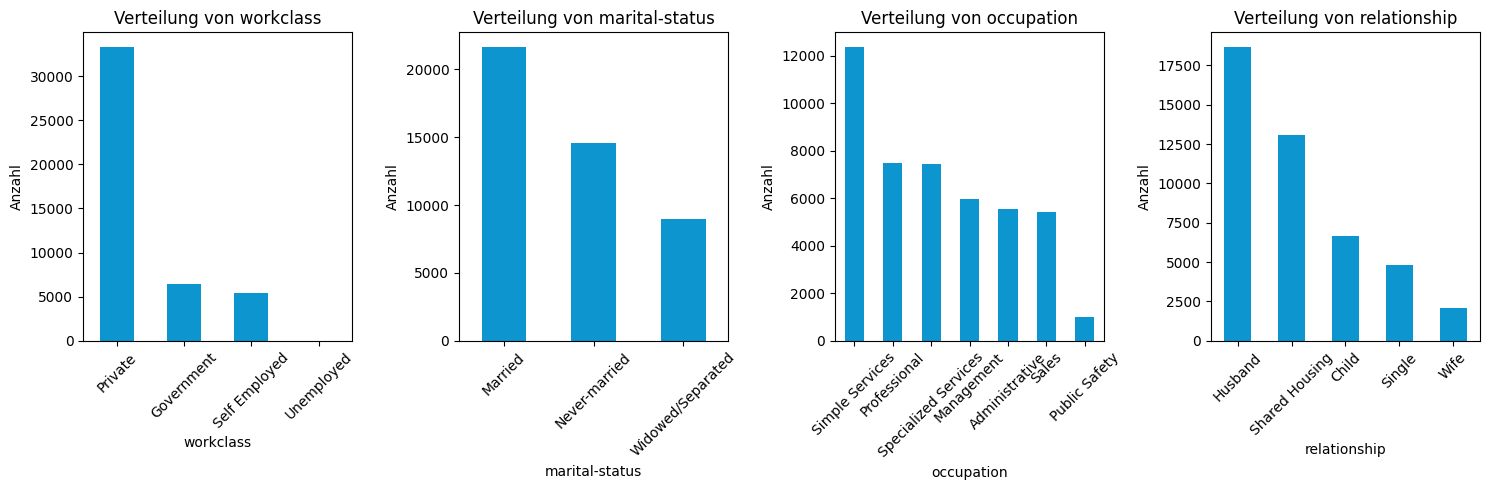

In [37]:
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship']

fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))

for col, ax in zip(categorical_columns, axes):
    df[col].value_counts().plot(kind='bar', ax=ax, color='#0D95D0')
    ax.set_title(f'Verteilung von {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Anzahl')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()